# Customer Segmentation using K-means Clustering

## Customer Segmentation

Customer segmentation is the practice of dividing the addressable market into meaningfully distinct groups of customers. Knowing customer segmentation is crucial across industry in the sense that it allows a company to achieve more effective, more efficient, and higher customer welfare. We formulate a typical customer segmentation problem which wholesale company is facing. Thereafter, we will show how one of machine learning technique can be applied to solve the problem.

## Problem setting

We formulate a marketing problem in which a wholesale company wants to categorize 440 customers. The company roughly have a sense that customers can be split into several segments, however, the company has yet to identify which customer belongs to which segments. On top of figuring out customer segmentation, the company wants to predict which category new customers are classified into which segmentation.

## Data - Wholesale customers Data Set
We chose wholesale customer data set available from the UC Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Wholesale+customers). The university maintain 488 data sets as a service to the machine learning community. The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories


## Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.)on grocery products (Continuous);

4) FROZEN: annual spending (m.u.)on frozen products (Continuous);

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous);

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal);

8) REGION: customers Region - Lisnon, Oporto or Other (Nominal);

To add a data file to CoLab notebook, first download it via [this link](https://drive.google.com/file/d/1Oc_5vNisNJHJrm27GSvVE26TEQjCbiWK/view?usp=sharing)!

Next, upload it by clicking 'Files' icon on the left vertical panel in your browser. Then run the code cells below. The code should find the file automatically.

First, we start from loading wholesale customer data set.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import io

In [4]:
# Read Wholesale customers data
df = pd.read_csv('Wholesale customers data.csv')

# Remove categorical features for simplicity
del(df['Channel'])
del(df['Region'])

# Show dataframe
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Following code is to convert dataframe to array so that training data can be input to K-means algorithm (sklearn.Kmeans)

In [5]:
# Convert dataframe to array so that training data can be input to sklearn.Kmeans
df_array = df.values
X = df_array

## K-means clustering

K-means clustering is the algorithm to assign data points to K clusters.
Suppose we have a data set $\{\mathbf{x}_1, ... \mathbf{x}_N\}$ consisting of $N$ observations, we want to partition the data set into some number $K$ of clusters. $K$ is called as hyperparameter, which we determine before running algorithm (Bishop, 2006). Practically, we can choose such $K$ as to fit the number of clusters we can observe by plotting data. If it is not obvious to observe clusters, we can run the algorithm for different $K$ and choose optimal results. 

The step of algorithm is illustrated in the diagram below;
Suppose data points are given and we already chose $K$.

(a) First, we randomly place the center of clusters. Here the number of clusters $K$ is 2. Green points indicates data points plotted before partitioning to clusters. The goal is to partition data points to 2 clusters.

(b) Assign each data point the red cluster or to the blue cluster, according to which cluster centre is nearer.

(c) Once data points are assigned in (b), cluster center is recalculated and updated.

Succeeding steps are iteration of (b) and (c);

(d) Re-assign each data point the red cluster or to the blue cluster, according to which cluster centre is nearer.

(e) Once data points are assigned in (d), cluster center is recalculated and updated.

(f) Re-assign each data point the red cluster or to the blue cluster, according to which cluster centre is nearer.

(g) Once data points are assigned in (f), cluster center is recalculated and updated.

(h) Re-assign each data point the red cluster or to the blue cluster, according to which cluster centre is nearer.

(i) Once data points are assigned in (h), cluster center is recalculated and updated. Since cluster center is not moved from previous iteration, we stop running algorithm.

Each step of running K-means clustering is shown below:






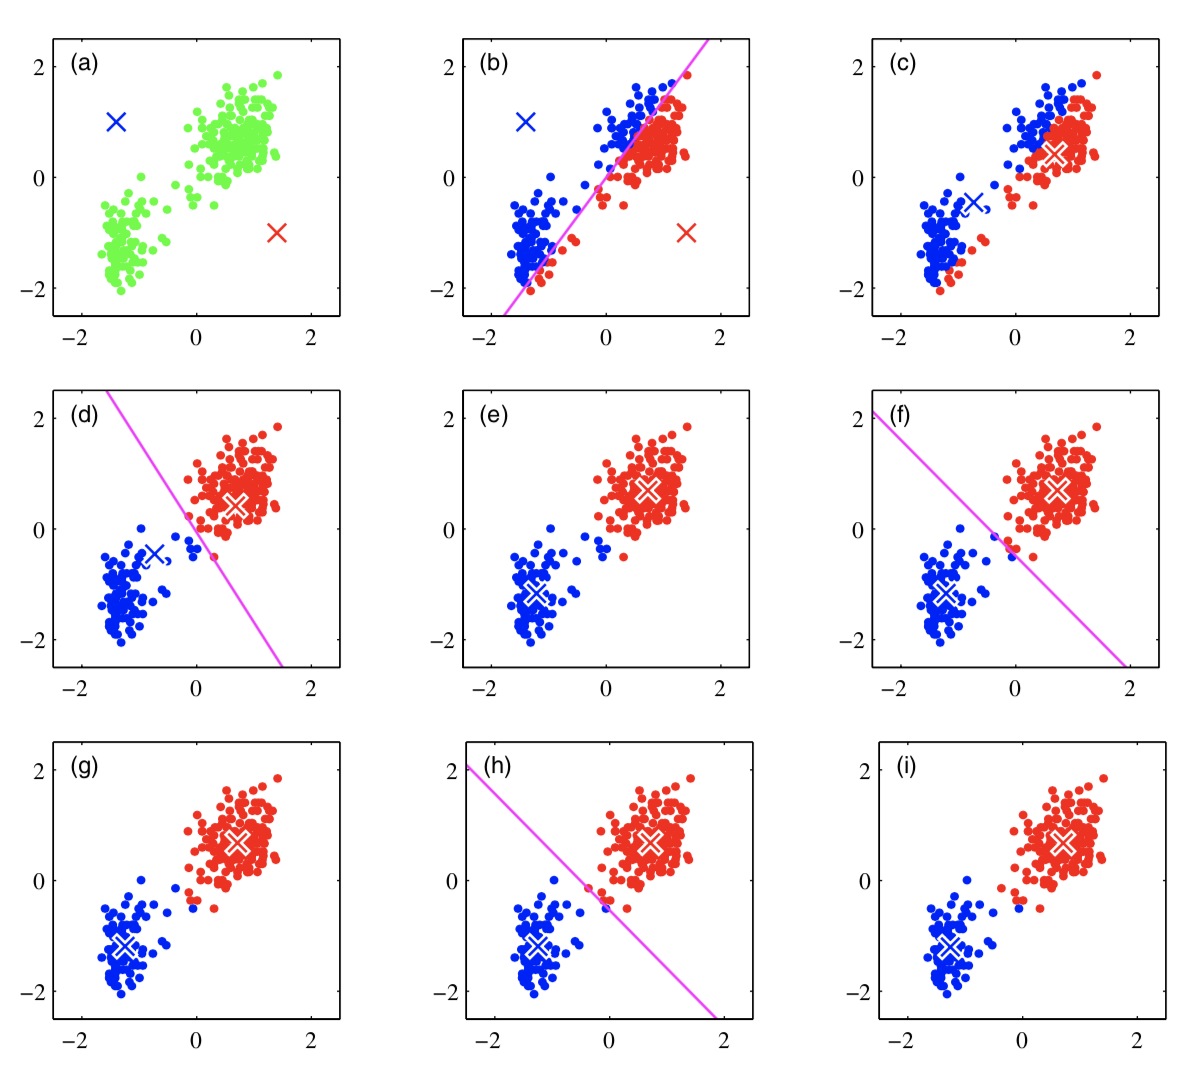

Above step can be summurized as following psuedo code;

***
### K-means algorithm
***
Given: Data points $\mathbf{x_n}; n \in \{1,...,N\}$, $K$ as hyperparameter

Initialize: the center of $K$ clusters $\mathbf{\mu}_k$ to be randomly placed

Goal: Minimize objective function $J$

$$J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\mathbf{x}_n - \mathbf{\mu}_k||^2$$
where</p>
$$r_{nk}=\left\{\begin{matrix}
1 & k = arg min_j ||\mathbf{x}_n - \mathbf{\mu}_k||^2\\ 
0 & otherwise
\end{matrix}\right., 
\mathbf{\mu}_k = \frac{\sum_{n} r_{nk} \mathbf{x}_n}{\sum_{n} r_{nk}}$$
Iterate until $r_{nk}$ and $\mathbf{\mu}_k$ will no longer change
***



We use scikit learn to apply K-means clustering. Here we chose 5 as $K$ (i.e. assumed 5 segments). For more details, please find https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [6]:
# Apply Kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

After applying K-means clustering, we add extra column to identify which cluster is assigned for each data

In [7]:
# Add cluster to original dataframe
df['cluster_id'] = y_kmeans
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,3


Following code is to display average spending tendency per each cluster; First calculate average spendings of different product per cluster. Then, plot the spendings breakdown by clusters.

<Figure size 432x288 with 0 Axes>

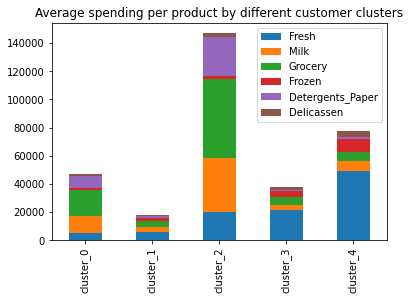

In [8]:
# Define dataframe to store average spending by cluster
df_cluster = pd.DataFrame()

# Store average spending per product
for i in range(kmeans.n_clusters):
    df_cluster['cluster_' + str(i)] = df.drop('cluster_id', axis=1)[df['cluster_id'] == i].mean()

# plot average spending per product by different customer clusters
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
df_cluster.T.plot(kind='bar', stacked=True, title="Average spending per product by different customer clusters")
plt.show()

Following is actual average spendings breakdown by cluster.

In [9]:
df_cluster

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
Fresh,4991.481481,6143.871681,20031.285714,21480.388350,49330.739130
Milk,12140.543210,3276.792035,38084.000000,3911.601942,6823.260870
Grocery,18505.506173,4115.163717,56126.142857,5154.563107,6338.521739
Frozen,1591.111111,2438.349558,2564.571429,4188.650485,9666.086957
Detergents_Paper,8148.246914,1220.703540,27644.571429,1131.912621,950.913043
Delicassen,1822.407407,992.539823,2548.142857,1712.135922,4557.695652


Now that we have customer segmentation model, we can predict which cluster new customer is assigned by the model. For a new customer spends 70000 for Fresh, 8000 for Milk, 9000 for Grocery, 8000 for Frozen, 500 for Detergents_Paper, 10000 for Delicassen, the model predicts its cluster.

In [10]:
# Predict segment for new customer profile

# customer who spends 70000 for Fresh, 8000 for Milk, 9000 for Grocery, 8000 for Frozen, 500 for Detergents_Paper, 10000 for Delicassen
new_cust1_array = np.array([70000, 8000, 9000, 8000, 500, 10000]).reshape(-1, 1).T

# Predict segment for new customer 1
kmeans.predict(new_cust1_array)

array([4], dtype=int32)

We can plot the new customer's spendings profile and compare with average spending tendency per different clusters. Model prediction make sense in terms of spending profile.

<Figure size 432x288 with 0 Axes>

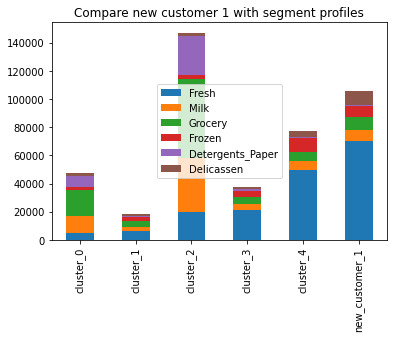

In [11]:
# compare new customer 1 with segment profiles
df_cluster['new_customer_1'] = [70000, 8000, 9000, 8000, 500, 10000]

plt.figure()
df_cluster.T.plot(kind='bar', stacked=True, title="Compare new customer 1 with segment profiles")
plt.show()

# Remove new customer 1
df_cluster = df_cluster.drop(columns=['new_customer_1'])

We can predict for another customer. The another customer spends 10000 for Fresh, 20000 for Milk, 80000 for Grocery, 7000 for Frozen, 10000 for Detergents_Paper, 20000.

In [12]:
# Predict segment for new customer profile

# customer who spends 10000 for Fresh, 20000 for Milk, 80000 for Grocery, 7000 for Frozen, 10000 for Detergents_Paper, 20000 for Delicassen
new_cust2_array = np.array([10000, 20000, 80000, 7000, 10000, 20000]).reshape(-1, 1).T

# Predict segment for new customer 2
kmeans.predict(new_cust2_array)

array([2], dtype=int32)

We can plot the another new customer's spendings profile and compare with average spending tendency per different clusters. Again, model prediction make sense in terms of spending profile.

<Figure size 432x288 with 0 Axes>

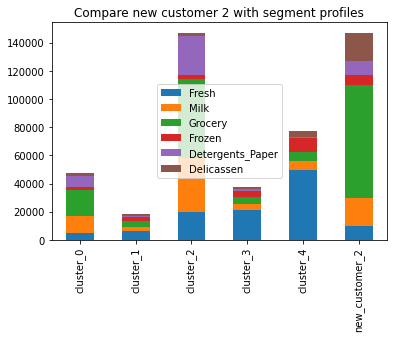

In [13]:
# compare new customer 2 with segment profiles
df_cluster['new_customer_2'] = [10000, 20000, 80000, 7000, 10000, 20000]

plt.figure()
df_cluster.T.plot(kind='bar', stacked=True, title="Compare new customer 2 with segment profiles")
plt.show()

# Remove new customer 2
df_cluster = df_cluster.drop(columns=['new_customer_2'])

## Reference

C,Bishop. (2006), Pattern Recognition and Machine Learning, Springer.